In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Data Collection**
The following two cells were provided from the Wisconsin Breast Cancer Diagnostic dataset website https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [2]:
!pip install ucimlrepo


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

## Using Pandas DataFrames
The above cell contained a link to the data in a csv format and I used this to create a pandas dataframe.





In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

# the below link was retrieved from importing the dataset above
csv_url = 'https://archive.ics.uci.edu/static/public/17/data.csv'
data = pd.read_csv(csv_url)

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

# **Data Preprocessing**
Dropping ID column as it has no relevance







In [5]:
def drop_id(data):
  data = data.drop('ID', axis=1)

  print(data.info())
  return data


data = drop_id(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

## Renaming Columns to Understand Features Clearer

 For the dataset, the value 1 represents the mean value of an attribute, 2 represents the standard error, and 3 is the worst value of the attribute. This representation of the dataset was based on the same dataset in [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data). I will update the column names to these categories to understand the features more clearly: 1 will be renamed to _mean, 2 to _se, and 3 to _worst.

In [6]:

def rename_columns(column_name):
    if '1' in column_name:
        return column_name.replace('1', '_mean')
    elif '2' in column_name:
        return column_name.replace('2', '_se')
    elif '3' in column_name:
        return column_name.replace('3', '_worst')
    return column_name


data.columns = [rename_columns(col) for col in data.columns]

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave_points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

## Checking Dataset Balance


Number of Benign Cases: 357
Number of Malignant Cases: 212


/tmp/ipykernel_16/2982000669.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  benign_count = data['Diagnosis'].value_counts()[0]
/tmp/ipykernel_16/2982000669.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  malignant_count = data['Diagnosis'].value_counts()[1]


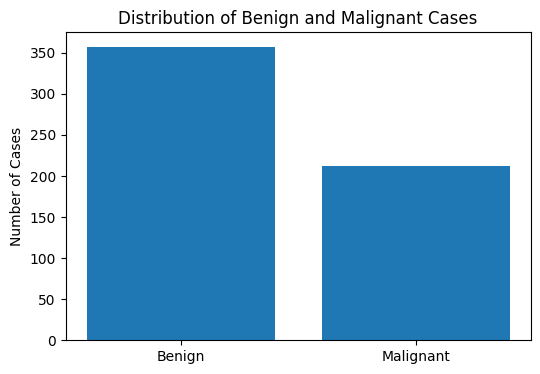

In [7]:
def plot_diagnosis_distribution(data):

    benign_count = data['Diagnosis'].value_counts()[0]
    malignant_count = data['Diagnosis'].value_counts()[1]

    print(f"Number of Benign Cases: {benign_count}")
    print(f"Number of Malignant Cases: {malignant_count}")


    plt.figure(figsize=(6, 4))
    plt.bar(['Benign', 'Malignant'], [benign_count, malignant_count])
    plt.title('Distribution of Benign and Malignant Cases')
    plt.ylabel('Number of Cases')
    plt.show()


plot_diagnosis_distribution(data)

# almost double the amount of benign cases

## Checking and Replacing any Null Values

In [8]:
def replacing_null(data):
    nulls_exist = data.isnull().sum().sum()
    null_counts_per_column = data.isnull().sum()
    print("Null counts per column:\n", null_counts_per_column)
    print("Total null values:", data.isnull().sum().sum())
    if nulls_exist:
        for class_value in data["Diagnosis"].unique():
            class_data = data[data["Diagnosis"] == class_value]
            data.loc[data["Diagnosis"] == class_value] = class_data.fillna(class_data.mean())
        print("Null values replaced with the mean value of the attribute in that class.")
    else:
        print("No null values found.")

    return data

data = replacing_null(data)


Null counts per column:
 radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Diagnosis                  0
dtype: int64
Total null values: 0
No null values found.


## EDA


### Boxplots of All Attributes

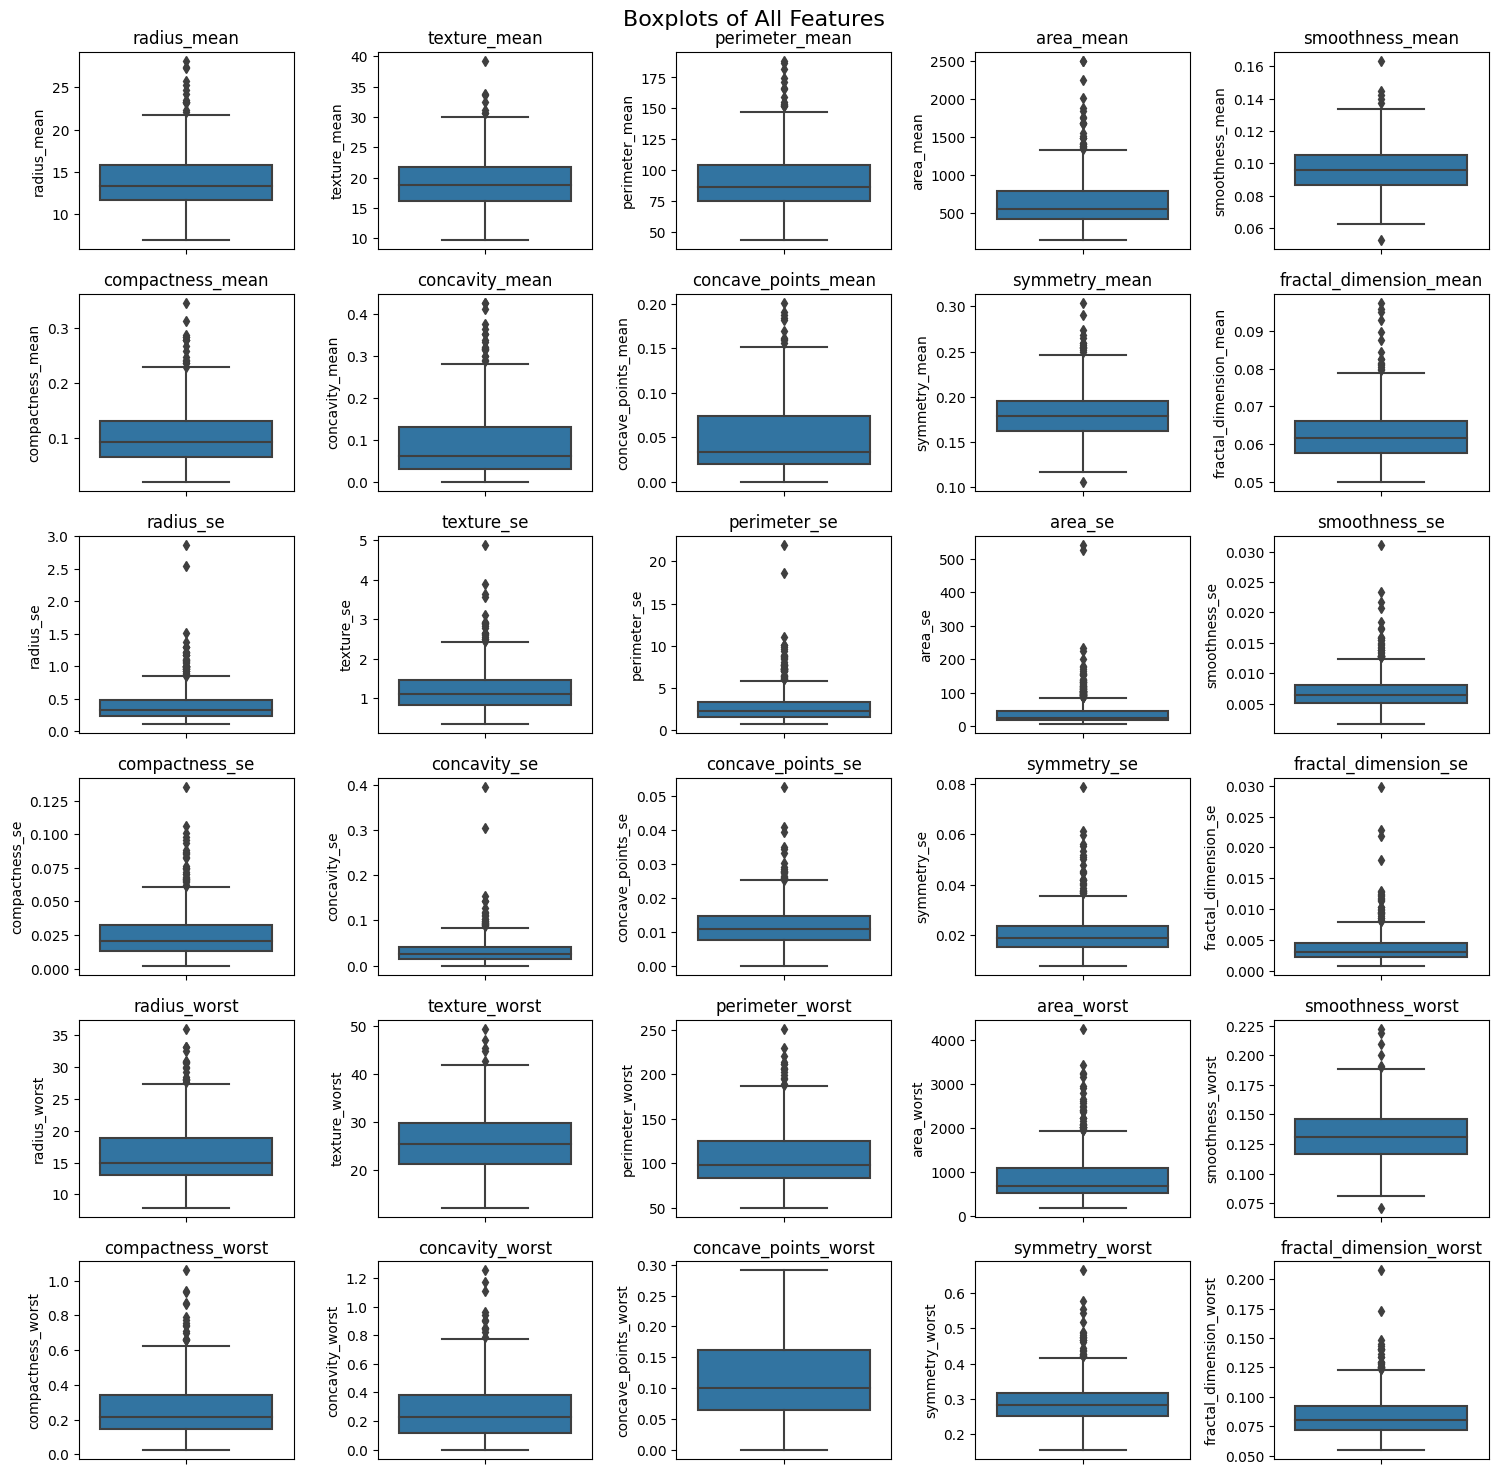

In [9]:
def plot_all_attributes(data):
  features = data.drop('Diagnosis', axis=1).columns

  fig, axes = plt.subplots(6, 5, figsize=(15, 15)) # 6 rows, 5 columns -> plots all 30 features
  fig.suptitle('Boxplots of All Features', fontsize=16)
  axes = axes.flatten()


  for i, feature in enumerate(features):
      sns.boxplot(y=data[feature], ax=axes[i])
      axes[i].set_title(feature)


  plt.tight_layout(rect=[0, 0, 1, 1]) # adjustment to help fit
  plt.show()

plot_all_attributes(data)

### Boxplots of Attributes by Category

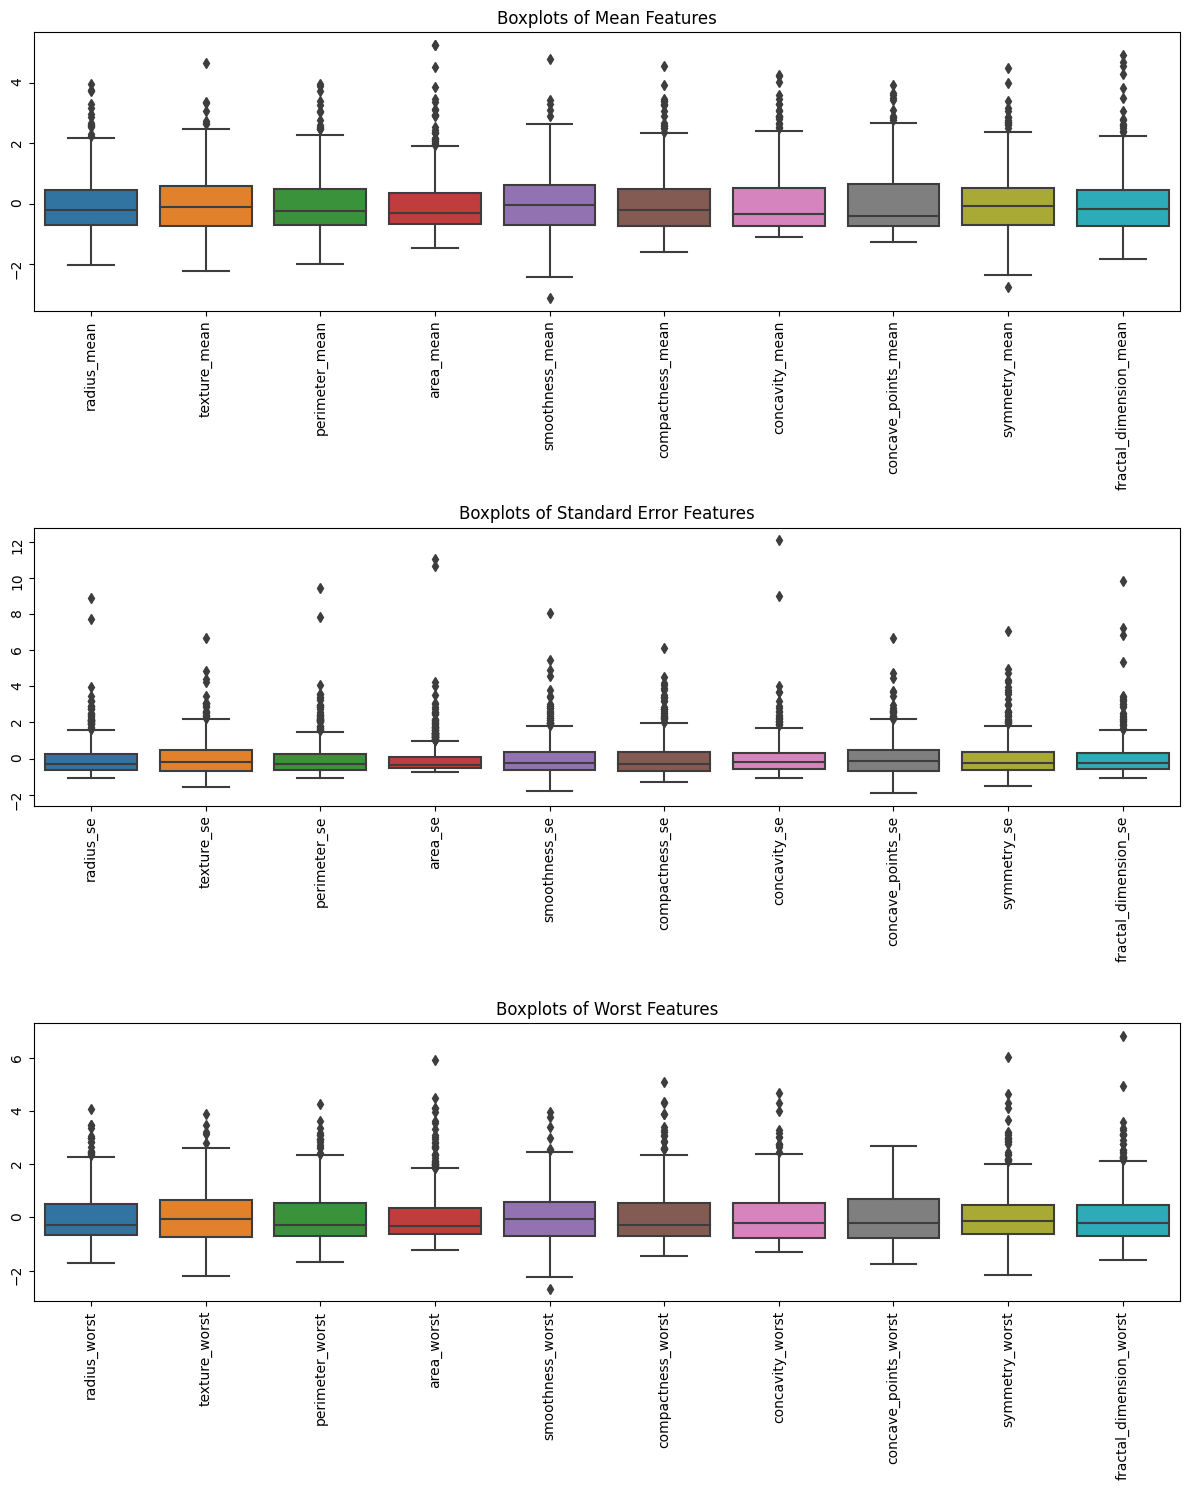

In [10]:
from sklearn.preprocessing import StandardScaler

def plot_boxplots_by_category(data):


    mean_features = [col for col in data.columns if col.endswith('_mean')]
    se_features = [col for col in data.columns if col.endswith('_se')]
    worst_features = [col for col in data.columns if col.endswith('_worst')]

    categories = {
        'Mean': mean_features,
        'Standard Error': se_features,
        'Worst': worst_features
    }


    # normalizing features so certain features won't skew the range of data shown
    scaler = StandardScaler()
    normalized_data = data.copy()
    for category, features in categories.items():
        normalized_data[features] = scaler.fit_transform(data[features])

    fig, axes = plt.subplots(3, 1, figsize=(12, 15))  # 3 rows, 1 col -> plots the 3 different categories with one plot per



    for i, (category, features) in enumerate(categories.items()):
        sns.boxplot(data=normalized_data[features], ax=axes[i])
        axes[i].set_title(f'Boxplots of {category} Features')
        axes[i].tick_params(rotation=90) # features are written vertically on the x axis

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()


plot_boxplots_by_category(data)


From the plot above, we can see numerous different details of the data. For example, the three area_ features seem to commonly have extreme outliers that are far greater than most of the other features. We can also see that features like the three concave_points_ features have fewer outliers that are still fairly close to the max of its boxplot.

### Boxplots of Attributes by Category and Diagnosis Results

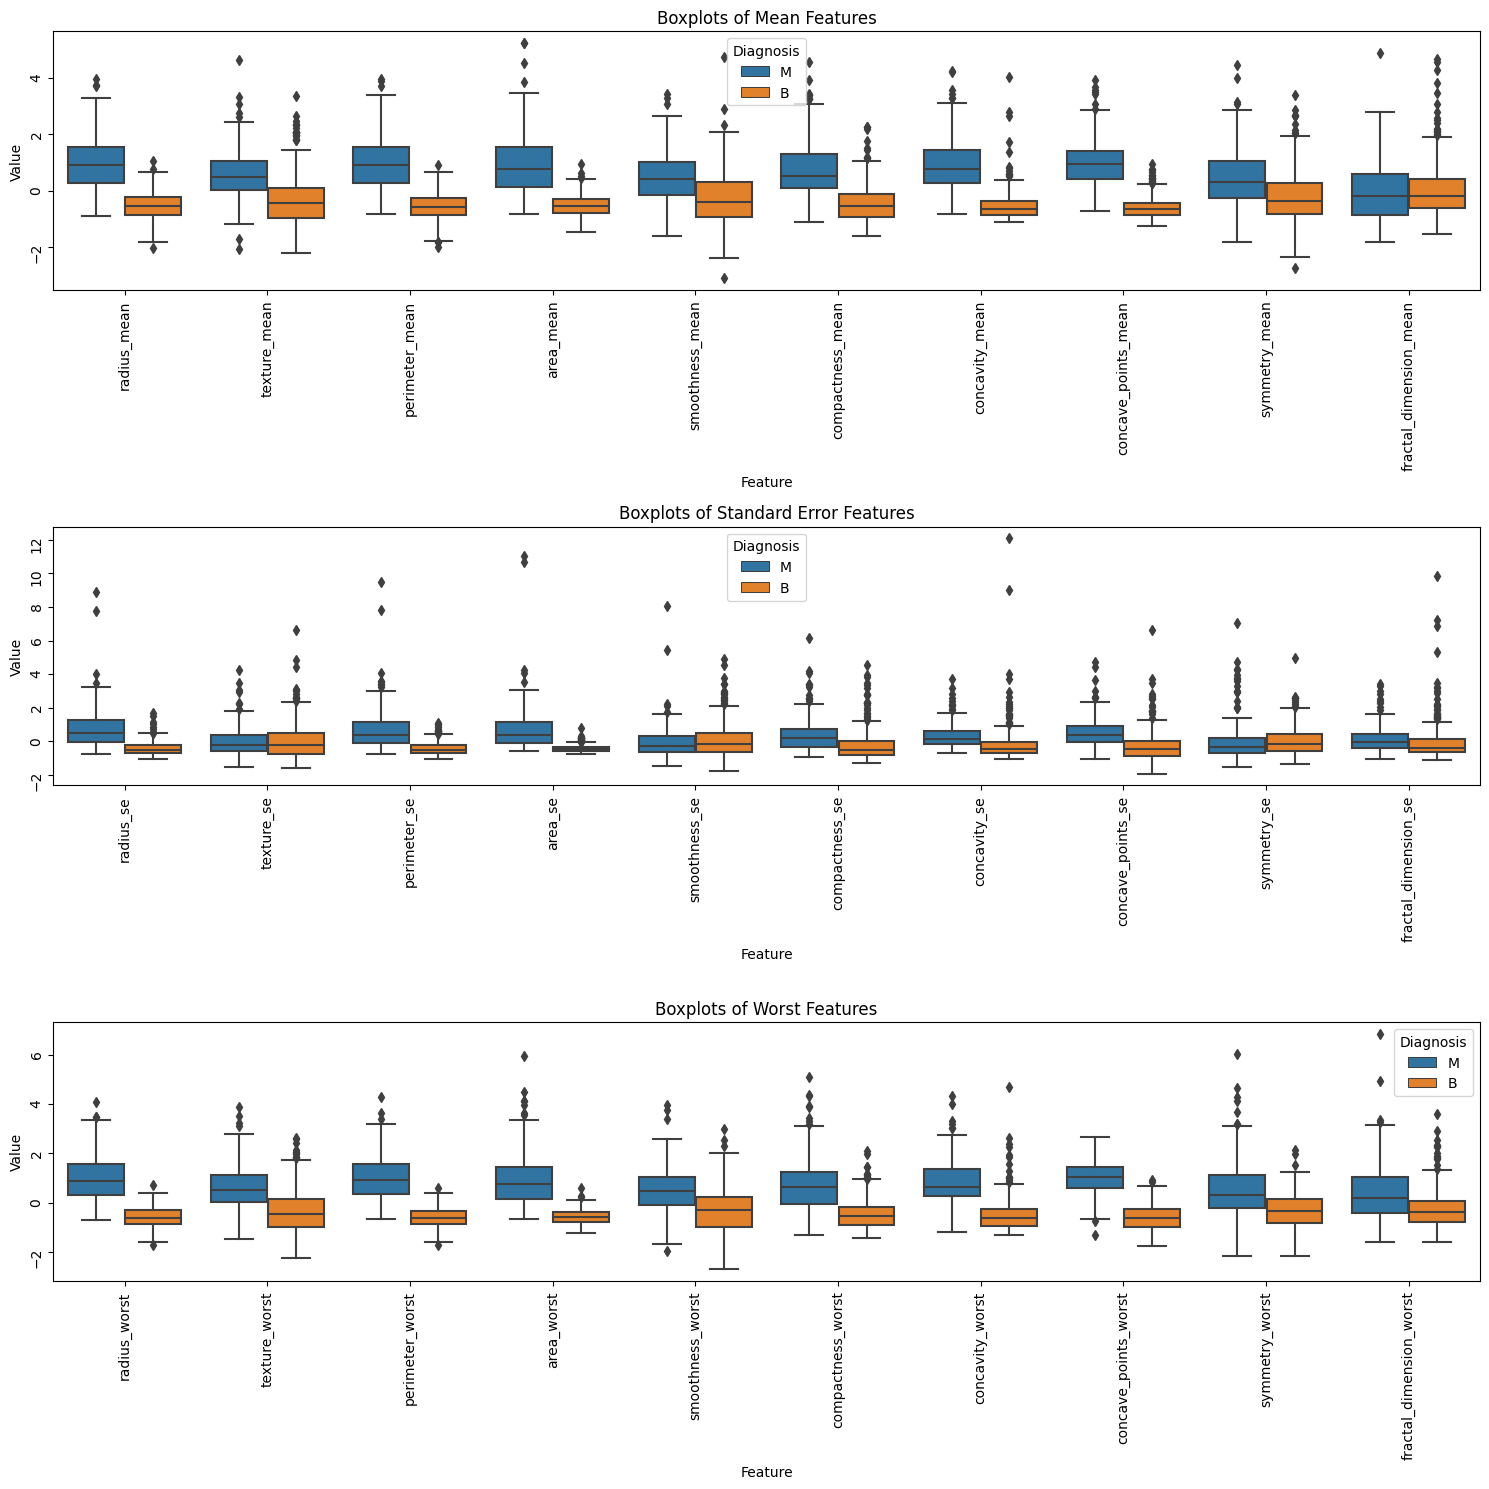

In [11]:
def plot_boxplots_by_diagnosis(data):


    mean_features = [col for col in data.columns if col.endswith('_mean')]
    se_features = [col for col in data.columns if col.endswith('_se')]
    worst_features = [col for col in data.columns if col.endswith('_worst')]


    categories = {
        'Mean': mean_features,
        'Standard Error': se_features,
        'Worst': worst_features
    }



    # getting all unique diagnosis results
    diagnoses = data['Diagnosis'].unique()

    # normalizing features so certain features won't skew the range of data shown
    scaler = StandardScaler()
    normalized_data = data.copy()

    # if this cell is ran again after the numerical encoding, it will ensure that it will be changed back into categorical form
    normalized_data = normalized_data.replace({0: 'B', 1: 'M'})

    for category, features in categories.items():
        # fitting and transforming the data by the scaler
        normalized_data[features] = scaler.fit_transform(data[features])



    fig, axes = plt.subplots(3, 1, figsize=(15, 15)) # 3 rows, 1 col -> plots the 3 different categories with one plot per


    for i, (category, features) in enumerate(categories.items()):
        data_long = pd.melt(normalized_data, id_vars='Diagnosis', value_vars=features,
                            var_name='Feature', value_name='Value')


        sns.boxplot(x='Feature', y='Value', hue='Diagnosis', data=data_long, ax=axes[i])
        axes[i].set_title(f'Boxplots of {category} Features')
        axes[i].tick_params(rotation=90) # features are written vertically on the x axis

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()


plot_boxplots_by_diagnosis(data)



# 0 -> benign, 1 -> malignant

As shown from the boxplots above, we can see that for most of the malignant cases, the overall boxplot value for each feature is USUALLY larger or the same as the benign cases.

### Evaluating Correlation

Highly correlated features will be nearing a score of 1

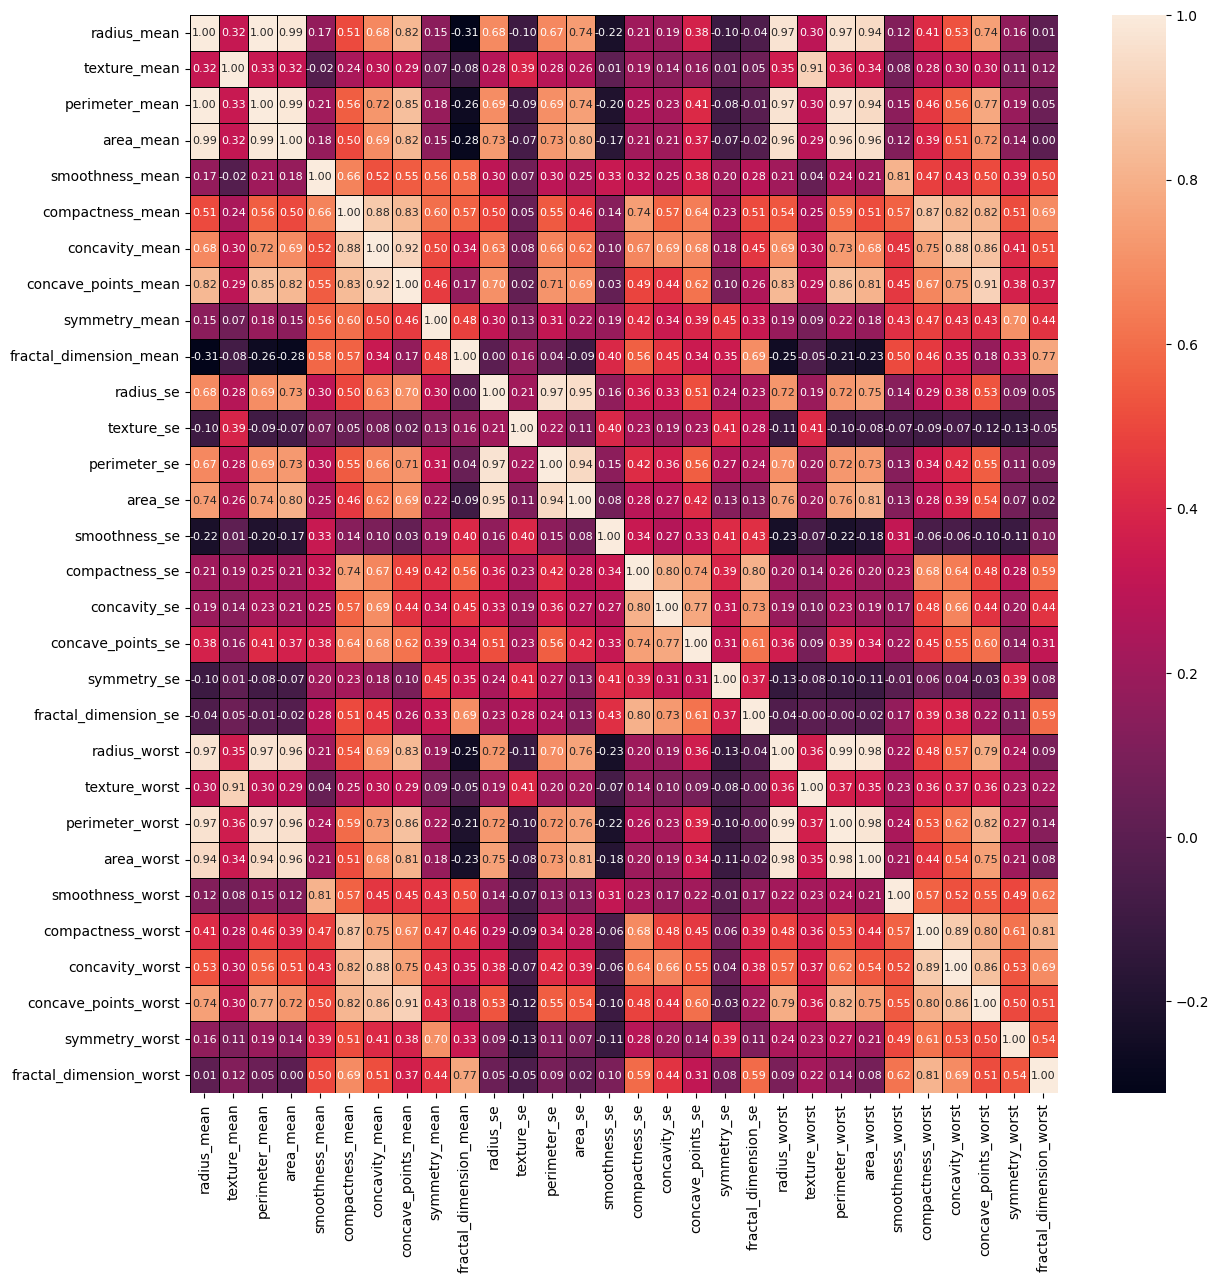

In [12]:
def plot_correlation_matrix(data):

    correlation_matrix = data.drop('Diagnosis', axis=1).corr()

    plt.figure(figsize=(14, 14))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', # to two decimal places
               linewidths=0.5, linecolor='black', annot_kws={"size": 8})  # 8 is font size for numbers in the small boxes
    plt.show()

plot_correlation_matrix(data)

Based on this correlation matrix, we can see which parameters are highly correlated with each other. For example as seen in the plot above, radius_, perimeter_, and area_ features are highly correlated with each other which makes sense, because these features are geometrical measurements and most likely capture very similar information. As these features are highly correlated and capture the same information and patterns, it will lead to redundancy, so it might be a good idea to try dropping some of the features to make the model more simple.

## Numerical encoding for Diagnosis (output): B (benign) -> 0, M (malignant) -> 1

In [13]:
data = data.replace({'B': 0, 'M': 1})

/tmp/ipykernel_16/3363249405.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'B': 0, 'M': 1})


## Creating Training and Test Sets
Will use sklearns train_test_split.

Using a random_state so my runs are reproducible

Also using stratify in train_test_split so the class distribution is preserved in both sets. For example, without stratification the training set could be 63% benign and 37% malignant where as the test set could be 58% benign and 42% malignant.

In [14]:
from sklearn.model_selection import train_test_split

def create_train_test_split(data):
  y = data['Diagnosis']
  X = data.drop('Diagnosis', axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # sklearn train_test_split has built in randomization, and setting stratify
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = create_train_test_split(data)


## Scaling Data

In [15]:
from sklearn.preprocessing import MinMaxScaler

def scaling_data(X_train, X_test):
  # initilazing scaler to scale data from [0, 1]
  scaler = MinMaxScaler()

  # fitting the scaler and then transforming
  X_train = scaler.fit_transform(X_train)

  # transforming, already fit on X_train
  X_test = scaler.transform(X_test)
  return X_train, X_test


X_train, X_test = scaling_data(X_train, X_test)

print(X_train)

[[0.29008269 0.2746888  0.27070086 ... 0.28298969 0.28760103 0.09477896]
 [0.34585841 0.72365145 0.3325414  ... 0.36013746 0.13502858 0.18476978]
 [0.33705171 0.4560166  0.32129131 ... 0.23522337 0.13483146 0.19598583]
 ...
 [0.35662214 0.53278008 0.34924184 ... 0.46804124 0.22333925 0.1867375 ]
 [0.61397329 0.94439834 0.58842848 ... 0.55841924 0.22629608 0.13537977]
 [0.28910416 0.24854772 0.28153169 ... 0.34948454 0.08555096 0.10645415]]


# **Model Training and Evaluation**
Will be using sklearns KNeighborsClassifier
### F1 Score over Accuracy?

- Precision: How many of the predicted positive cases are actually positive?
- Recall: How many of the actual positive cases are correctly predicted by the model?
- Accuracy: How many predictions were correct out of all predictions made?

Usually an accuracy score is enough however, [due to the inbalance of the dataset shown above](#scrollTo=m22tgkqHzUiF&line=2&uniqifier=1) it is far better to use a metric such as F1 score that works well on an inbalanced dataset.

F1 score uses recall and precision to avoid a misleading high accuracy that can happen in an unbalanced dataset where the model can predict the majority class very well (high accuracy from a normal accuracy metric) but not the minority class. Also, using average='macro' to get the F1 score for all classes equally, regardless of balance of classes.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

def training_model(X_train, y_train, X_test, y_test):

  for k in range(1, 11):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)

      y_pred = knn.predict(X_test)


      f1 = f1_score(y_test, y_pred, average='macro') # using macro we get F1 score for each class individually and then average them
      print(f"F1 Score for {k} neighbors:", f1)


training_model(X_train, y_train, X_test, y_test)

F1 Score for 1 neighbors: 0.9246031746031746
F1 Score for 2 neighbors: 0.9415384615384615
F1 Score for 3 neighbors: 0.933693394266722
F1 Score for 4 neighbors: 0.9422297297297297
F1 Score for 5 neighbors: 0.9619111259605747
F1 Score for 6 neighbors: 0.9619111259605747
F1 Score for 7 neighbors: 0.9715828832571667
F1 Score for 8 neighbors: 0.9619111259605747
F1 Score for 9 neighbors: 0.9715828832571667
F1 Score for 10 neighbors: 0.9619111259605747


# **Results**


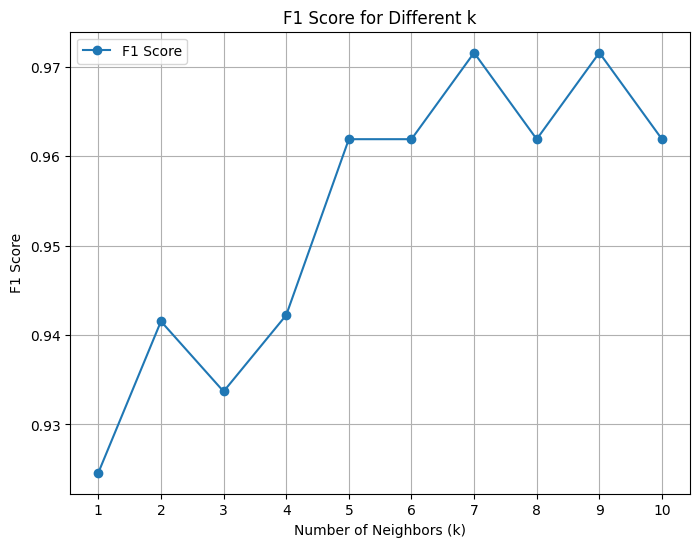

In [17]:

def plotting_results(X_train, y_train, X_test, y_test):
  f1_scores = []

  for k in range(1, 11):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)

      y_pred = knn.predict(X_test)
      f1_scores.append(f1_score(y_test, y_pred, average='macro'))


  plt.figure(figsize=(8, 6))
  plt.plot(range(1, 11), f1_scores, marker='o', label='F1 Score')
  plt.title('F1 Score for Different k')
  plt.xlabel('Number of Neighbors (k)')
  plt.ylabel('F1 Score')
  plt.xticks(range(1, 11))
  plt.grid(True)
  plt.legend()
  plt.show()

plotting_results(X_train, y_train, X_test, y_test)

From the plot shown above, we can see that increasing k will continue to increase accuracy until k = 8 where we see a decrease. After this, when k goes to 9 it changes and increases its accuracy but then again continues to decreases at 10. I believe the best k to choose is 5-7, the accuracy from 1 was increasing and was relatively stable, but after 7, fluctations start and may become more extreme, causing high k values to be less reliable.